### Library Import and setting of audio directory

In [1]:
import librosa
import os
import matplotlib.pyplot as plt

# Specify your audio sample folder path
audio_folder = "sample_input"

following chunk misunderstands `librosa.feature()` call

In [28]:
# Define features to extract (adjust as needed)
# features = ["spectral_centroid", "chroma_stft"]

### find audio files in folder and list them (currently just one)

In [2]:
# Iterate through audio files
for filename in os.listdir(audio_folder):
    
    if filename.endswith(".wav") or filename.endswith(".mp3"): # look for the right extensions
        audiofile = os.path.join(audio_folder, filename) # store full path to file
        print(audiofile) # tell us which file was found

sample_input/synth-guitar-mellow-loop_80bpm_D_minor.wav


### load the audiofile and store it as an np.array `y` and its samplerate `sr`

In [3]:
y, sr = librosa.load(audiofile)

In [4]:
# Create dictionary to store features and filenames
audio_data = {}

# prepare a list to store extracted feature
file_features = []

# just computing two features and storing them
file_features.append(librosa.feature.chroma_stft(y = y))
file_features.append(librosa.feature.spectral_contrast(y = y))

# Store features and filename
audio_data[audiofile] = file_features

In [9]:
y[1:10]

array([1.6260959e-05, 3.9204773e-05, 4.6677596e-05, 6.7616929e-05,
       6.3198233e-05, 9.3489136e-05, 1.0396109e-04, 1.0120389e-04,
       9.4398412e-05], dtype=float32)

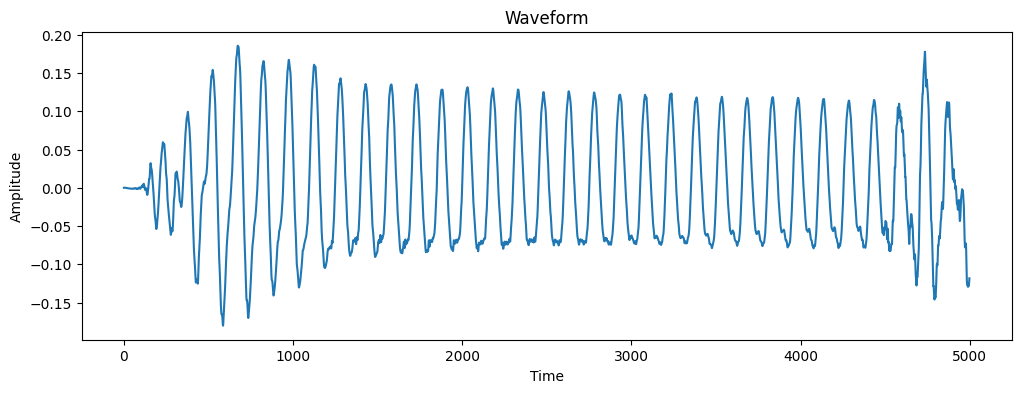

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))
plt.plot(y[1:5000])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

In [ ]:
# Define a weighted similarity metric function: a weighted sum of their Euclidean distance and cosine similarity
def weighted_similarity(features1, features2, weight_euclidean = 0.5, weight_cosine = 0.5):
    euclidean_dist = similarity_euclidean(features1, features2)
    cosine_sim = similarity_cosine(features1, features2)
    return weight_euclidean * euclidean_dist + weight_cosine * cosine_sim


# Organize files based on similarity
clusters = {}
for filename1, features1 in audio_data.items():
    min_dist = float("inf")
    closest_file = None
    for filename2, features2 in audio_data.items():
        if filename1 != filename2:
            dist = similarity(features1, features2)
            if dist < min_dist:
                min_dist = dist
                closest_file = filename2
    # Add file to cluster with closest neighbor
    if closest_file not in clusters:
        clusters[closest_file] = []
    clusters[closest_file].append(filename1)

# Create new folder structure and move files
for cluster_file, filenames in clusters.items():
    cluster_name = os.path.splitext(cluster_file)[0]
    os.makedirs(os.path.join("organized_audio", cluster_name), exist_ok=True)
    for filename in filenames:
        source_path = os.path.join(audio_folder, filename)
        dest_path = os.path.join("organized_audio", cluster_name, filename)
        os.rename(source_path, dest_path)

print("Audio files organized based on similarity!")
